**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - AXXXXX

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  A01795898

Yamil Abraham Nechar Reyes - A01795726

# Caravan Insurance

Dataset proporcionado por la compañía holandesa de minería de datos Sentient Machine Research. El objetivo principal es predecir qué clientes tienen una póliza de seguro para caravanas.

### Características principales:

* Fuente: Datos de clientes reales, anonimizados y preparados para una competición de minería de datos.

* Volumen: Contiene información de más de 9.000 clientes en total.

* Variables: Cada cliente se describe mediante 86 atributos.

Tipos de Datos:

* **Datos Sociodemográficos (Atributos 1-43)**: Información derivada de los códigos postales de los clientes. Todos los residentes de una misma zona postal comparten estos mismos atributos (ej. porcentaje de hogares alquilados, distribución por nivel de ingresos, etc.).

* **Datos de Uso de Productos** (Atributos 44-86): Reflejan la posesión o uso de otros productos y servicios por parte del cliente.

* **Variable Objetivo:** El atributo 86, "CARAVAN: Number of mobile home policies", indica si un cliente tiene o no un seguro de caravana.

### Estructura de los Archivos:

El proyecto se divide en tres archivos con campos separados por tabuladores:

##### TICDATA2000.txt (Conjunto de Entrenamiento):

Registros: 5.822 clientes.

Contenido: Incluye los 86 atributos completos, incluida la variable objetivo. Se utiliza para desarrollar, entrenar y validar los modelos predictivos.

##### TICEVAL2000.txt (Conjunto de Evaluación):

Registros: 4.000 clientes.

Contenido: Tiene el mismo formato que el archivo de entrenamiento, pero no incluye la variable objetivo. Este archivo se utiliza para realizar las predicciones finales con el modelo ya construido.

#####  TICTGTS2000.txt (Soluciones del Conjunto de Evaluación):

Contenido: Contiene las respuestas reales (targets) para los 4.000 clientes del conjunto de evaluación. Solo los organizadores tenían esta información, permitiendo así la evaluación objetiva de las predicciones realizadas por los participantes.

Nota Importante: Todas las variables cuyo nombre comienza por "M" son variables de código postal que proporcionan información sobre la distribución de una característica específica en el área de residencia del cliente.

In [1]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pointbiserialr
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from pycaret.classification import predict_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pycaret.classification import setup, compare_models
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Preprocesamiento de datos

**1.1 Carga de Datos**

In [2]:
file_name = 'insurance_company_original.csv'
sociodemographic_cols = [f"SD_{i}" for i in range(1, 44)]
product_cols = [f"PD_{i}" for i in range(44, 86)]
cols = sociodemographic_cols + product_cols + ["target"]

df = pd.read_csv(file_name, header=None, names=cols)
df.head()

,SD_1,SD_2,SD_3,SD_4,SD_5,SD_6,SD_7,SD_8,SD_9,SD_10,...,PD_77,PD_78,PD_79,PD_80,PD_81,PD_82,PD_83,PD_84,PD_85,target
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37,1,2,2,8,1,4,1.0,4.0,6,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
2,37,1,2,2,8,0,4,2.0,4.0,3,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9,1,3,3,3,2,3,2.0,4.0,5,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40,1,4,2,10,1,4,1.0,4.0,7,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00


1.2 Información General del Dataset

In [3]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SD_1    5822 non-null   int64  
 1   SD_2    5822 non-null   int64  
 2   SD_3    5822 non-null   int64  
 3   SD_4    5822 non-null   int64  
 4   SD_5    5822 non-null   int64  
 5   SD_6    5822 non-null   int64  
 6   SD_7    5822 non-null   int64  
 7   SD_8    5822 non-null   float64
 8   SD_9    5822 non-null   float64
 9   SD_10   5822 non-null   int64  
 10  SD_11   5822 non-null   float64
 11  SD_12   5822 non-null   float64
 12  SD_13   5822 non-null   float64
 13  SD_14   5822 non-null   float64
 14  SD_15   5822 non-null   int64  
 15  SD_16   5822 non-null   float64
 16  SD_17   5822 non-null   float64
 17  SD_18   5822 non-null   float64
 18  SD_19   5822 non-null   float64
 19  SD_20   5822 non-null   float64
 20  SD_21   5822 non-null   float64
 21  SD_2

In [4]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              SD_1         SD_2         SD_3         SD_4         SD_5  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

              SD_6         SD_7         SD_8         SD_9        SD_10  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069924     3.258519     6.183442  ...   
std       1.003234     1.715843     1.017502     1.597644     1.9094

In [5]:
df.loc[0]

SD_1      33.00
SD_2       1.00
SD_3       3.00
SD_4       2.00
SD_5       8.00
          ...  
PD_82      0.41
PD_83      0.42
PD_84      0.43
PD_85      0.44
target     0.45
Name: 0, Length: 86, dtype: float64

La primera fila fue eliminada porque contiene valores inconsistentes con el resto del dataset:
* Valores numéricos fuera de rango
* Su target no es 0 ni 1

Esto indica un problema de lectura o formato, y su inclusión podría sesgar el modelo.

In [6]:
df = df.iloc[1:].reset_index(drop=True)


1.3 Valores faltantes

In [7]:
print("\nValores faltantes por columna:")

cnt=0
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col}: {round(df[col].isna().sum()/len(df),2)}')
        cnt +=1 
if cnt==0:
    print('No hay faltantes')



Valores faltantes por columna:
No hay faltantes


1.4 Detectar incosistencias

#### 1.4.1 Eliminar observaciones repetidas es una buena práctica para evitar sobreajuste del modelo. La presencia de filas idénticas puede hacer que el algoritmo aprenda patrones redundantes y otorgue un peso excesivo a ciertas combinaciones de atributos, reduciendo su capacidad de generalización sobre nuevos datos.

In [8]:
prev_len = len(df)

duplicados = df[df.duplicated(keep=False)]
print(f"Filas con más de una aparición exacta (duplicados): {len(duplicados)}")
print(f"Porcentaje del dataset: {len(duplicados)/len(df)*100:.2f}%")


df = df.drop_duplicates()
print(f'Se han eliminado {prev_len-len(df)} filas duplicadas (se mantiene la primer observación)')

Filas con más de una aparición exacta (duplicados): 1078
Porcentaje del dataset: 18.52%
Se han eliminado 602 filas duplicadas (se mantiene la primer observación)


# EDA

In [9]:
# Balance de clases
target_dist = df['target'].value_counts()
print(f"Distribución target: {target_dist}")
positive = target_dist[1]/len(df)*100
case = "Se trata de un caso desbalanceado" if positive < 20 else "No hay desbalanceo de clases"
print('')
print(f"Ratio positivo: {positive:.2f}%, {case}")

Distribución target: 0.0    4879
1.0     340
Name: target, dtype: int64

Ratio positivo: 6.51%, Se trata de un caso desbalanceado


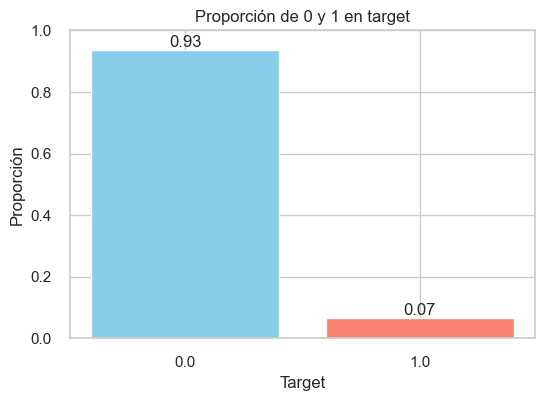

In [10]:
counts = df['target'].value_counts()
proportions = counts / counts.sum()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(proportions.index.astype(str), proportions.values, color=['skyblue', 'salmon'])
ax.set_ylim(0, 1)
ax.set_ylabel('Proporción')
ax.set_xlabel('Target')
ax.set_title('Proporción de 0 y 1 en target')

# Añadir etiquetas encima de cada barra sin usar ciclo for
ax.bar_label(bars, fmt='%.2f')

plt.show()

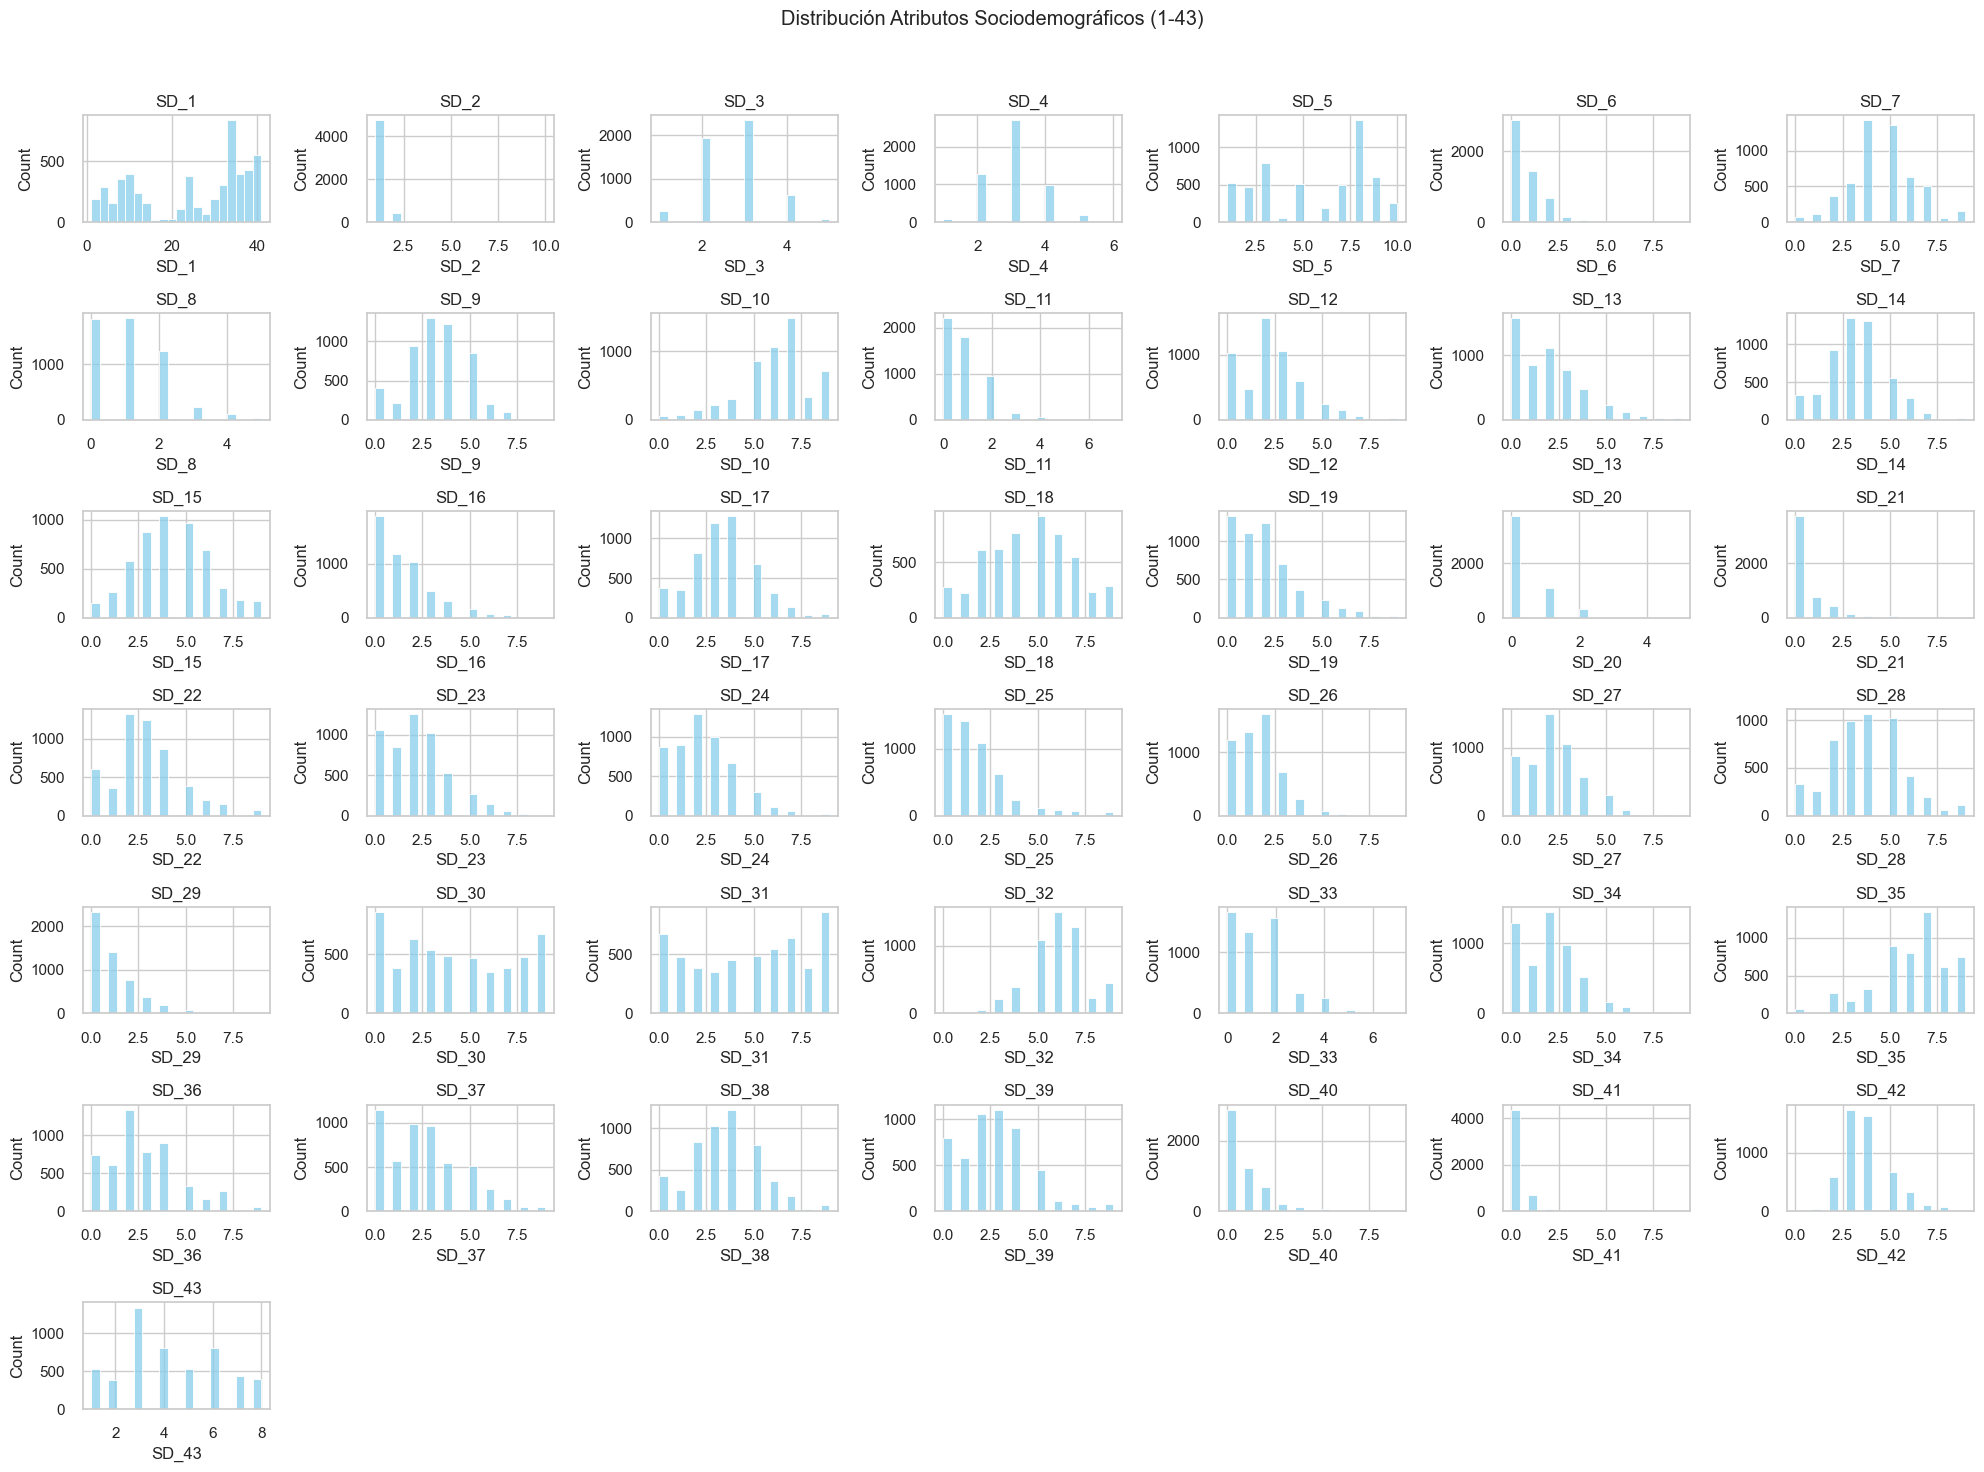

In [11]:
# Columnas
socio_cols = df.columns[:43]      # Atributos 1–43
product_cols = df.columns[43:-1]  # Atributos 44–84
target_col = df.columns[-1]       # Última columna: CARAVAN

# ---------------------------------------
# Distribución de features
# ---------------------------------------

# A) Sociodemográficos
plt.figure(figsize=(20,15))
for i, col in enumerate(socio_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(df[col], bins=20, kde=False, color='skyblue')
    plt.title(col)
plt.suptitle("Distribución Atributos Sociodemográficos (1-43)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

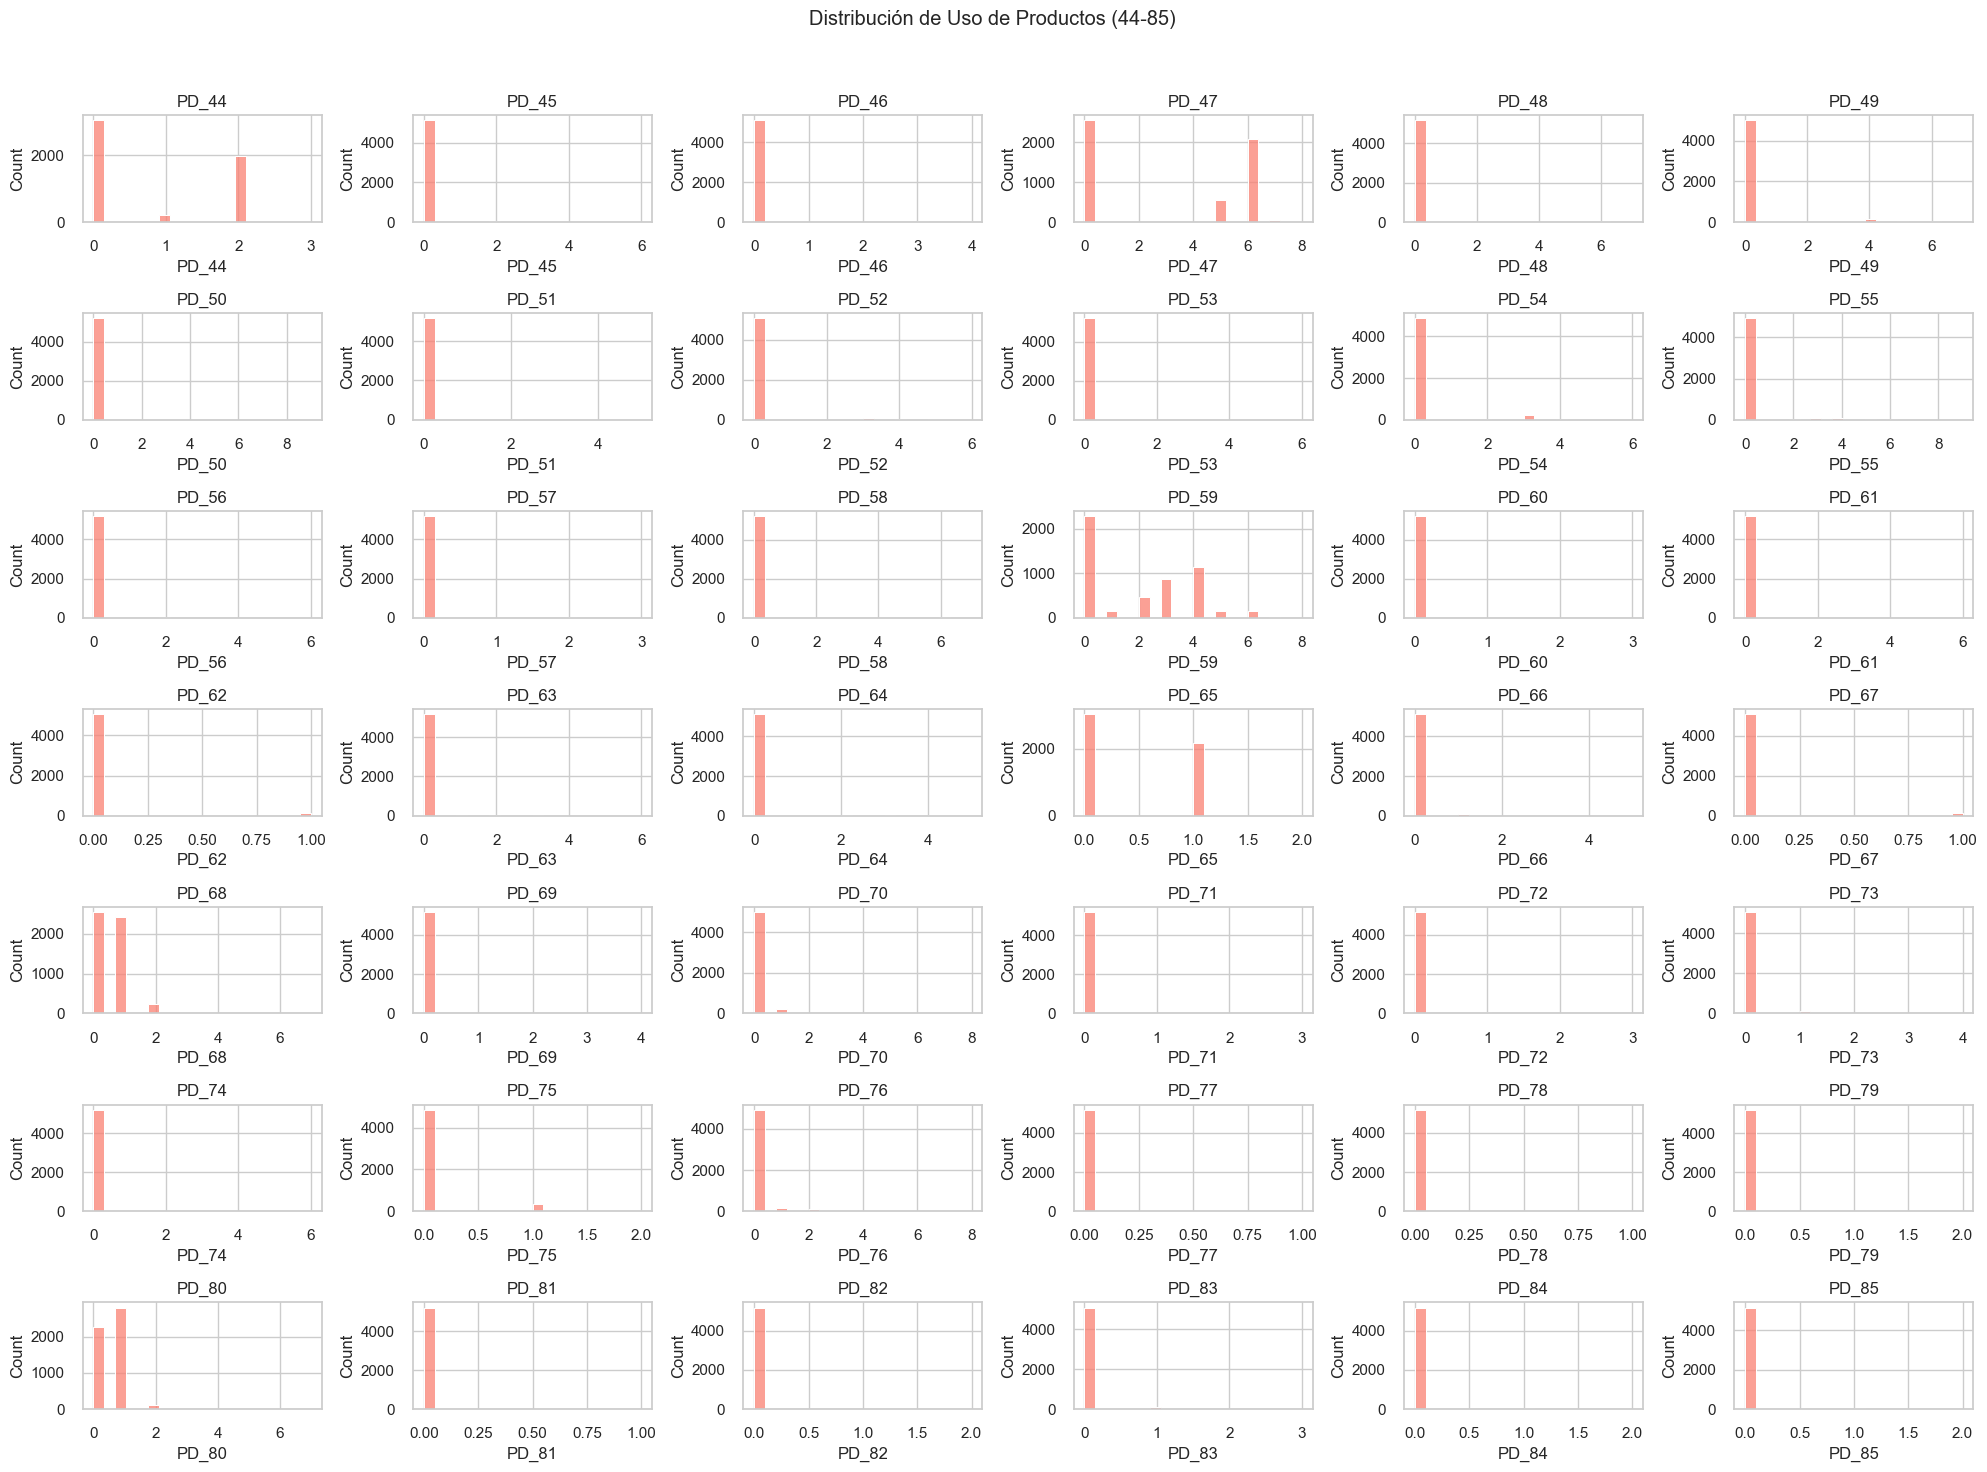

In [12]:
# B) Productos
plt.figure(figsize=(20,15))
for i, col in enumerate(product_cols):
    plt.subplot(7, 6, i+1)  # Ajustado a 6 columnas para que quepan
    sns.histplot(df[col], bins=20, kde=False, color='salmon')
    plt.title(col)
plt.suptitle("Distribución de Uso de Productos (44-85)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

CORRELACIONES FUERTES ENTRE VARIABLES SOCIODEMOGRÁFICAS (|r| > 0.7):
    var1   var2  correlation
6  SD_30  SD_31     0.999529
8  SD_35  SD_36     0.999202
0   SD_1   SD_5     0.992801
3  SD_10  SD_12     0.888044
1   SD_3  SD_15     0.796949
5  SD_17  SD_18     0.743157
2   SD_7   SD_9     0.741762
4  SD_12  SD_13     0.741067
7  SD_32  SD_34     0.740027


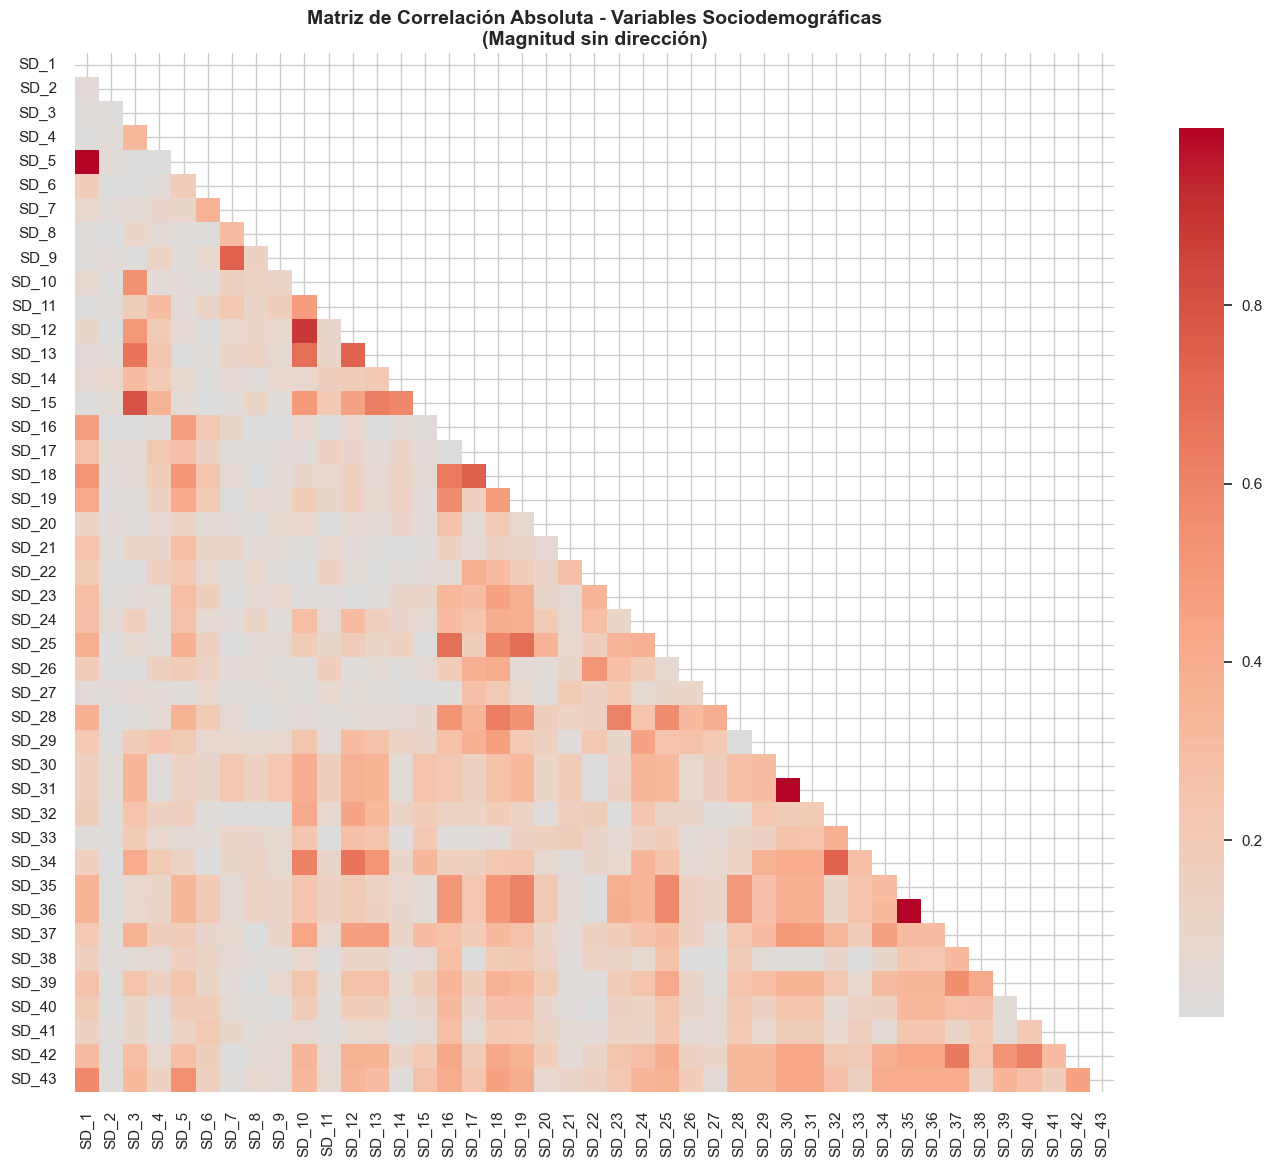

In [13]:
corr_abs = df[socio_cols].corr().abs()

high_corr_pairs = []
for i in range(len(corr_abs.columns)):
    for j in range(i+1, len(corr_abs.columns)):
        if corr_abs.iloc[i, j] > 0.7:
            high_corr_pairs.append({
                'var1': corr_abs.columns[i],
                'var2': corr_abs.columns[j], 
                'correlation': corr_abs.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False)

print("CORRELACIONES FUERTES ENTRE VARIABLES SOCIODEMOGRÁFICAS (|r| > 0.7):")
print(high_corr_df.head(10))

mask = np.triu(np.ones_like(corr_abs, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_abs, 
            mask=mask,
            cmap='coolwarm', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Absoluta - Variables Sociodemográficas\n(Magnitud sin dirección)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):
     var1   var2  correlation
2   PD_46  PD_67     0.987549
13  PD_57  PD_78     0.979954
0   PD_44  PD_65     0.979796
10  PD_54  PD_75     0.967607
20  PD_64  PD_85     0.966185
7   PD_51  PD_72     0.966042
6   PD_50  PD_71     0.948656
14  PD_58  PD_79     0.948408
18  PD_62  PD_83     0.935480
8   PD_52  PD_73     0.929653


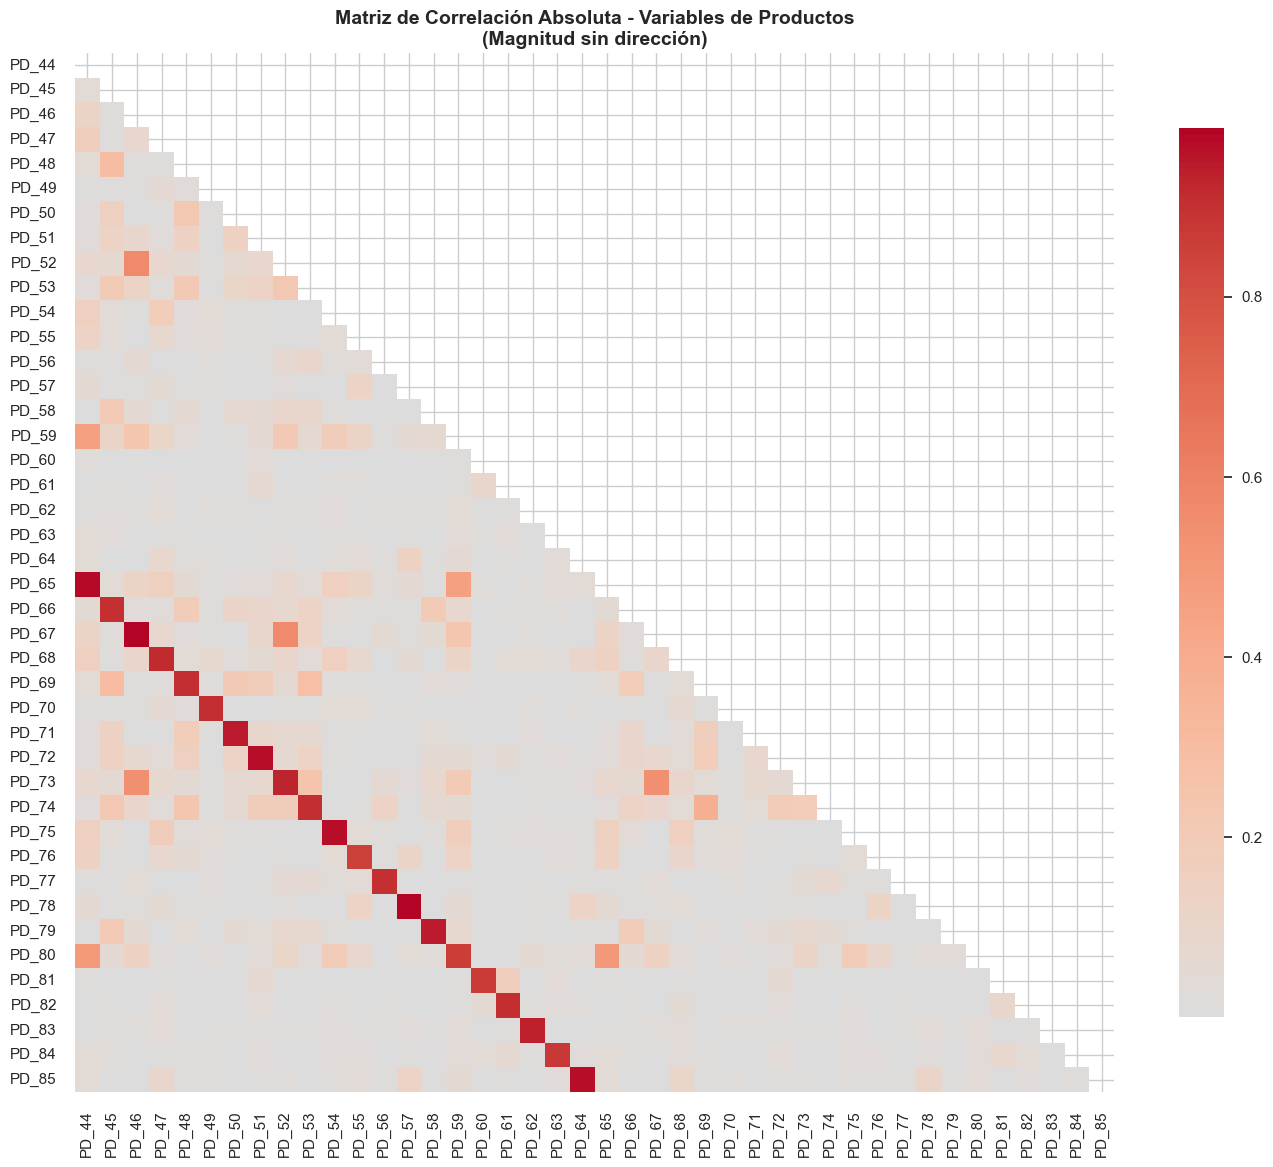

In [14]:
corr_abs_products = df[product_cols].corr().abs()

high_corr_pairs_products = []
for i in range(len(corr_abs_products.columns)):
    for j in range(i+1, len(corr_abs_products.columns)):
        if corr_abs_products.iloc[i, j] > 0.7:
            high_corr_pairs_products.append({
                'var1': corr_abs_products.columns[i],
                'var2': corr_abs_products.columns[j], 
                'correlation': corr_abs_products.iloc[i, j]
            })

high_corr_df_products = pd.DataFrame(high_corr_pairs_products).sort_values('correlation', ascending=False)

print("CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):")
print(high_corr_df_products.head(10))

mask_products = np.triu(np.ones_like(corr_abs_products, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_abs_products, 
            mask=mask_products,
            cmap='coolwarm', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Absoluta - Variables de Productos\n(Magnitud sin dirección)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

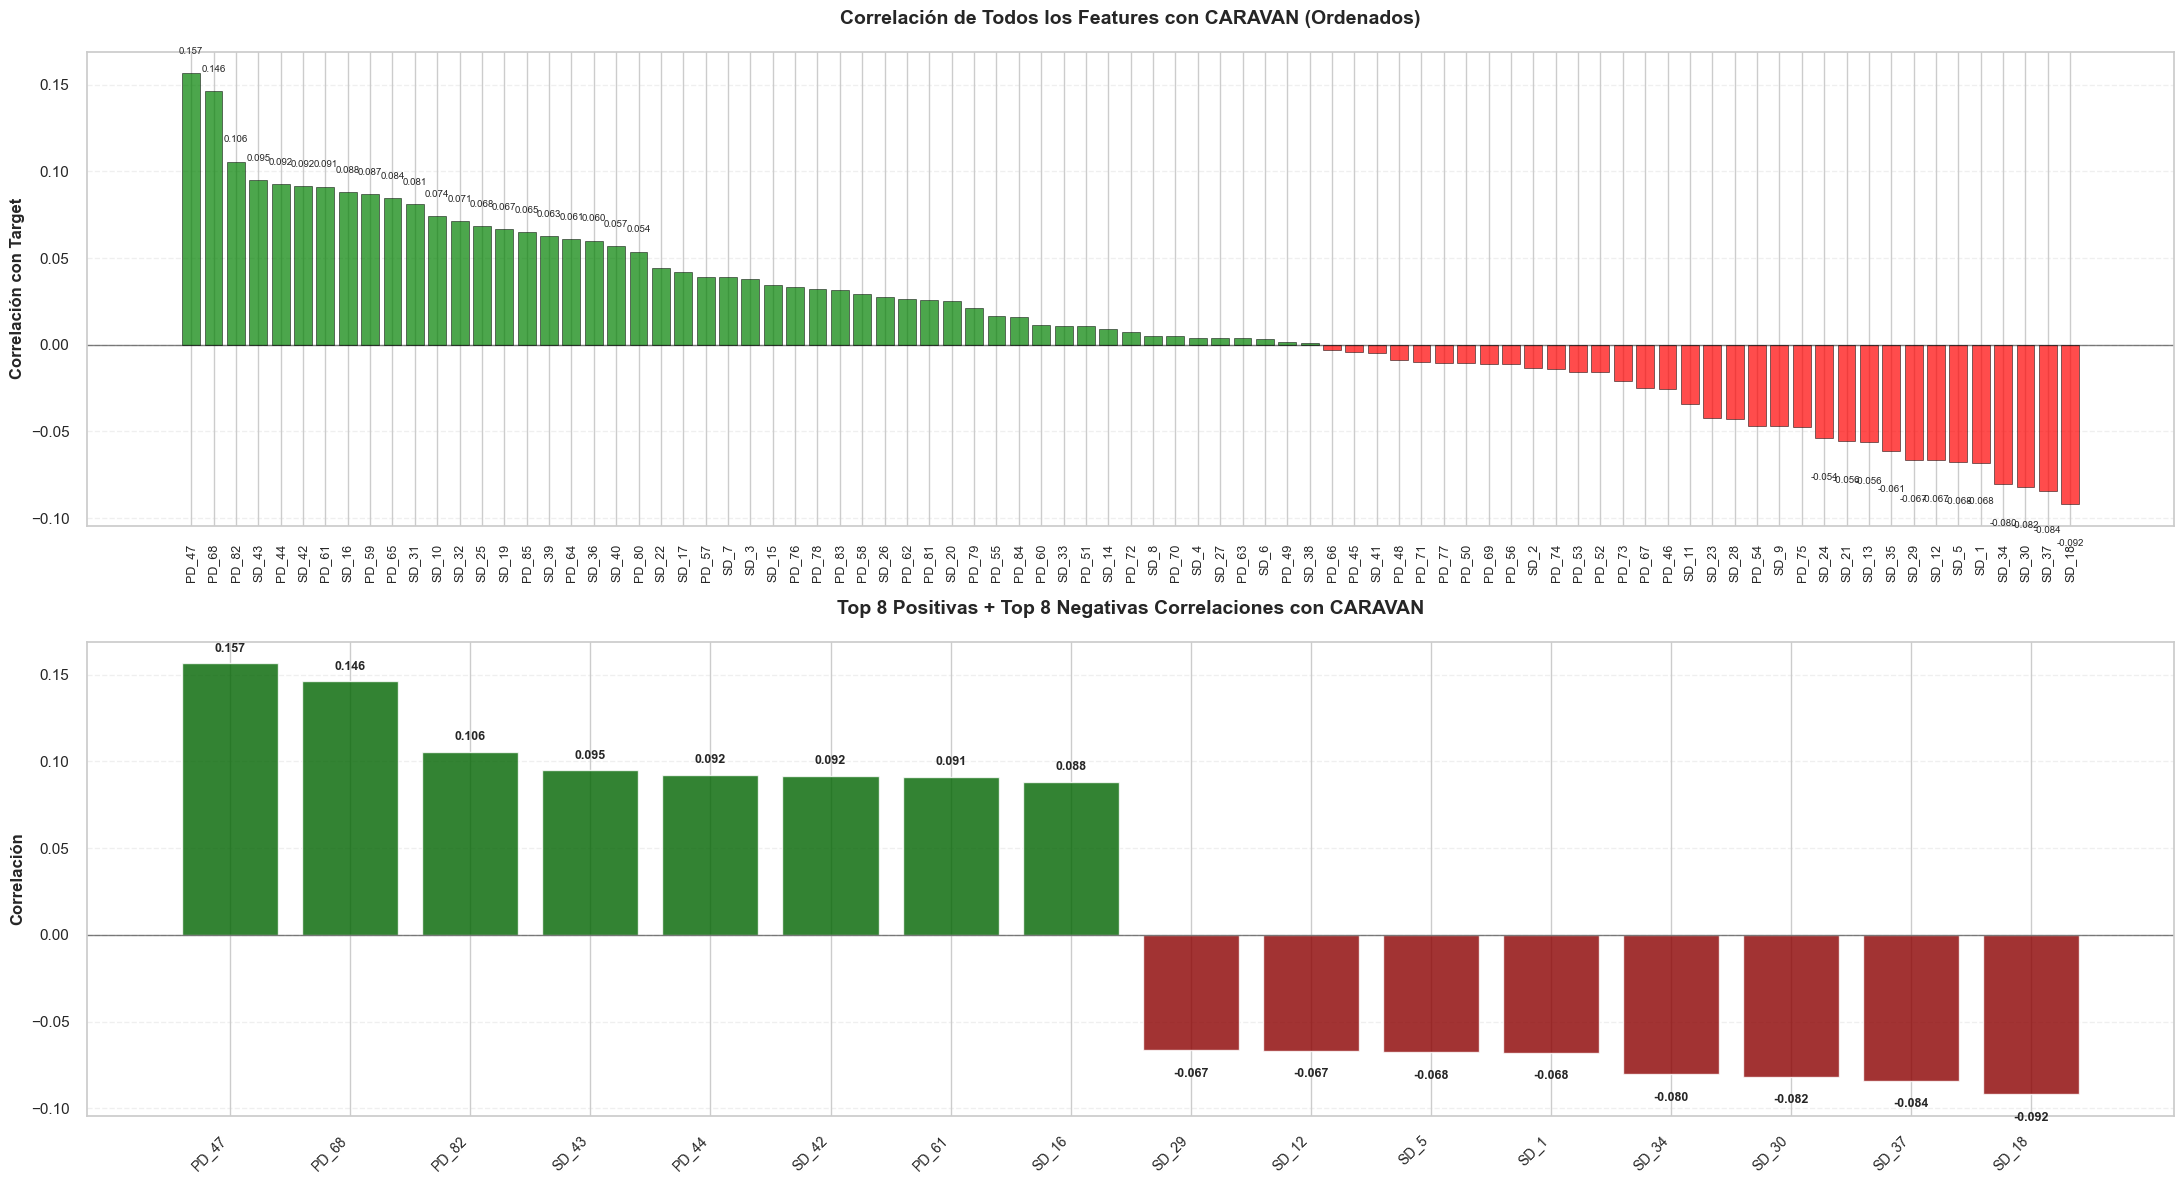

 RESUMEN DE CORRELACIONES CON TARGET:
Total features analizados: 85
Correlación máxima: 0.1565
Correlación mínima: -0.0919
Features con correlación > 0.1: 3
Features con correlación < -0.1: 0
Features con |correlación| > 0.05: 33

 TOP 5 CORRELACIONES POSITIVAS:
PD_47    0.156549
PD_68    0.146143
PD_82    0.105582
SD_43    0.094972
PD_44    0.092437
dtype: float64

 TOP 5 CORRELACIONES NEGATIVAS:
SD_1    -0.068104
SD_34   -0.080418
SD_30   -0.081840
SD_37   -0.084346
SD_18   -0.091940
dtype: float64


In [15]:
cor_target = {}

for col in df.columns[:-1]:
    corr, _ = pointbiserialr(df[col], df[target_col])
    cor_target[col] = corr
    
cor_target = pd.Series(cor_target).sort_values(key=abs, ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12))

cor_target_sorted = cor_target.sort_values(ascending=False)

bars1 = ax1.bar(cor_target_sorted.index, cor_target_sorted.values,
                color=['green' if x > 0 else 'red' for x in cor_target_sorted.values],
                alpha=0.7, edgecolor='black', linewidth=0.5)

ax1.set_xticks(range(len(cor_target_sorted)))
ax1.set_xticklabels(cor_target_sorted.index, rotation=90, fontsize=9)
ax1.set_ylabel("Correlación con Target", fontsize=12, fontweight='bold')
ax1.set_title("Correlación de Todos los Features con CARAVAN (Ordenados)", 
              fontsize=14, fontweight='bold', pad=20)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars1, cor_target_sorted.values)):
    if abs(value) > 0.05:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.02), 
                f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
                fontsize=7, rotation=0)

top_pos = cor_target_sorted.head(8)
top_neg = cor_target_sorted.tail(8)
top_combined = pd.concat([top_pos, top_neg])

colors_top = ['darkgreen' if x > 0 else 'darkred' for x in top_combined.values]
bars2 = ax2.bar(range(len(top_combined)), top_combined.values, color=colors_top, alpha=0.8)

ax2.set_xticks(range(len(top_combined)))
ax2.set_xticklabels(top_combined.index, rotation=45, fontsize=10, ha='right')
ax2.set_ylabel("Correlación", fontsize=12, fontweight='bold')
ax2.set_title("Top 8 Positivas + Top 8 Negativas Correlaciones con CARAVAN", 
              fontsize=14, fontweight='bold', pad=20)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars2, top_combined.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.005 if value > 0 else -0.01), 
            f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(" RESUMEN DE CORRELACIONES CON TARGET:")
print(f"Total features analizados: {len(cor_target)}")
print(f"Correlación máxima: {cor_target.max():.4f}")
print(f"Correlación mínima: {cor_target.min():.4f}")
print(f"Features con correlación > 0.1: {sum(cor_target > 0.1)}")
print(f"Features con correlación < -0.1: {sum(cor_target < -0.1)}")
print(f"Features con |correlación| > 0.05: {sum(abs(cor_target) > 0.05)}")

print("\n TOP 5 CORRELACIONES POSITIVAS:")
print(cor_target_sorted.head(5))
print("\n TOP 5 CORRELACIONES NEGATIVAS:")
print(cor_target_sorted.tail(5))

# Resultados del EDA

## 1) Multicolinealidad

* Se observa una alta correlación en pares entre columnas de información de producto y sociodemograficas, de la forma:
  - PD_65 - PD_44
  - PD_66 - PD_45
  - PD_67 - PD_46
  - ...
  - PD_85 - PD_64

Esto indica una **redundancia en los datos de productos**, probablemente debido a que algunas columnas son versiones derivadas o transformadas de otras, por lo que aportan poca información para un modelo, al ser redundantes es recomendable quedarnos con uno solo de los pares.




In [16]:
x1 = high_corr_df[high_corr_df['correlation']>0.95]
x1

,var1,var2,correlation
6,SD_30,SD_31,0.999529
8,SD_35,SD_36,0.999202
0,SD_1,SD_5,0.992801


In [17]:
x2 = high_corr_df_products[high_corr_df_products['correlation']>0.95]
x2

,var1,var2,correlation
2,PD_46,PD_67,0.987549
13,PD_57,PD_78,0.979954
0,PD_44,PD_65,0.979796
10,PD_54,PD_75,0.967607
20,PD_64,PD_85,0.966185
7,PD_51,PD_72,0.966042


In [18]:
# Elimino el par que tiene menor correlación con la variable target

cols_to_evaluate = pd.concat([x1, x2], axis=0)

cols_to_drop = []

for _, row in cols_to_evaluate.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    
    # Comparar la correlación absoluta con el target
    corr_var1 = abs(cor_target[var1])
    corr_var2 = abs(cor_target[var2])
    
    # Quedarse con la columna más correlacionada, eliminar la otra
    if corr_var1 < corr_var2:
        cols_to_drop.append(var1)
    else:
        cols_to_drop.append(var2)

cols_to_drop = list(set(cols_to_drop))

df = df.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Shape después de eliminar redundantes:", df.shape)


product_cols = list(set(product_cols) - set(cols_to_drop))
socio_cols = list(set(socio_cols) - set(cols_to_drop))

Columnas eliminadas: ['PD_67', 'PD_65', 'SD_5', 'PD_54', 'PD_72', 'SD_31', 'SD_36', 'PD_78', 'PD_64']
Shape después de eliminar redundantes: (5219, 77)


# Distribuciones

* Para los datos sociodemograficos existen muy pocas features en las que se aprecia una distribución diferente dependiendo del valor de 'target' por lo que se recomienda aplicar transformaciones que normalicen la distribución.

* Para el uso de productos se presentan distribuciones esparsas, con la mayoría de los datos acumulados en un solo valor, por lo que se recomienda eliminar aquellas en las que los valores diferentes al más común, no se relacionan con 'target'

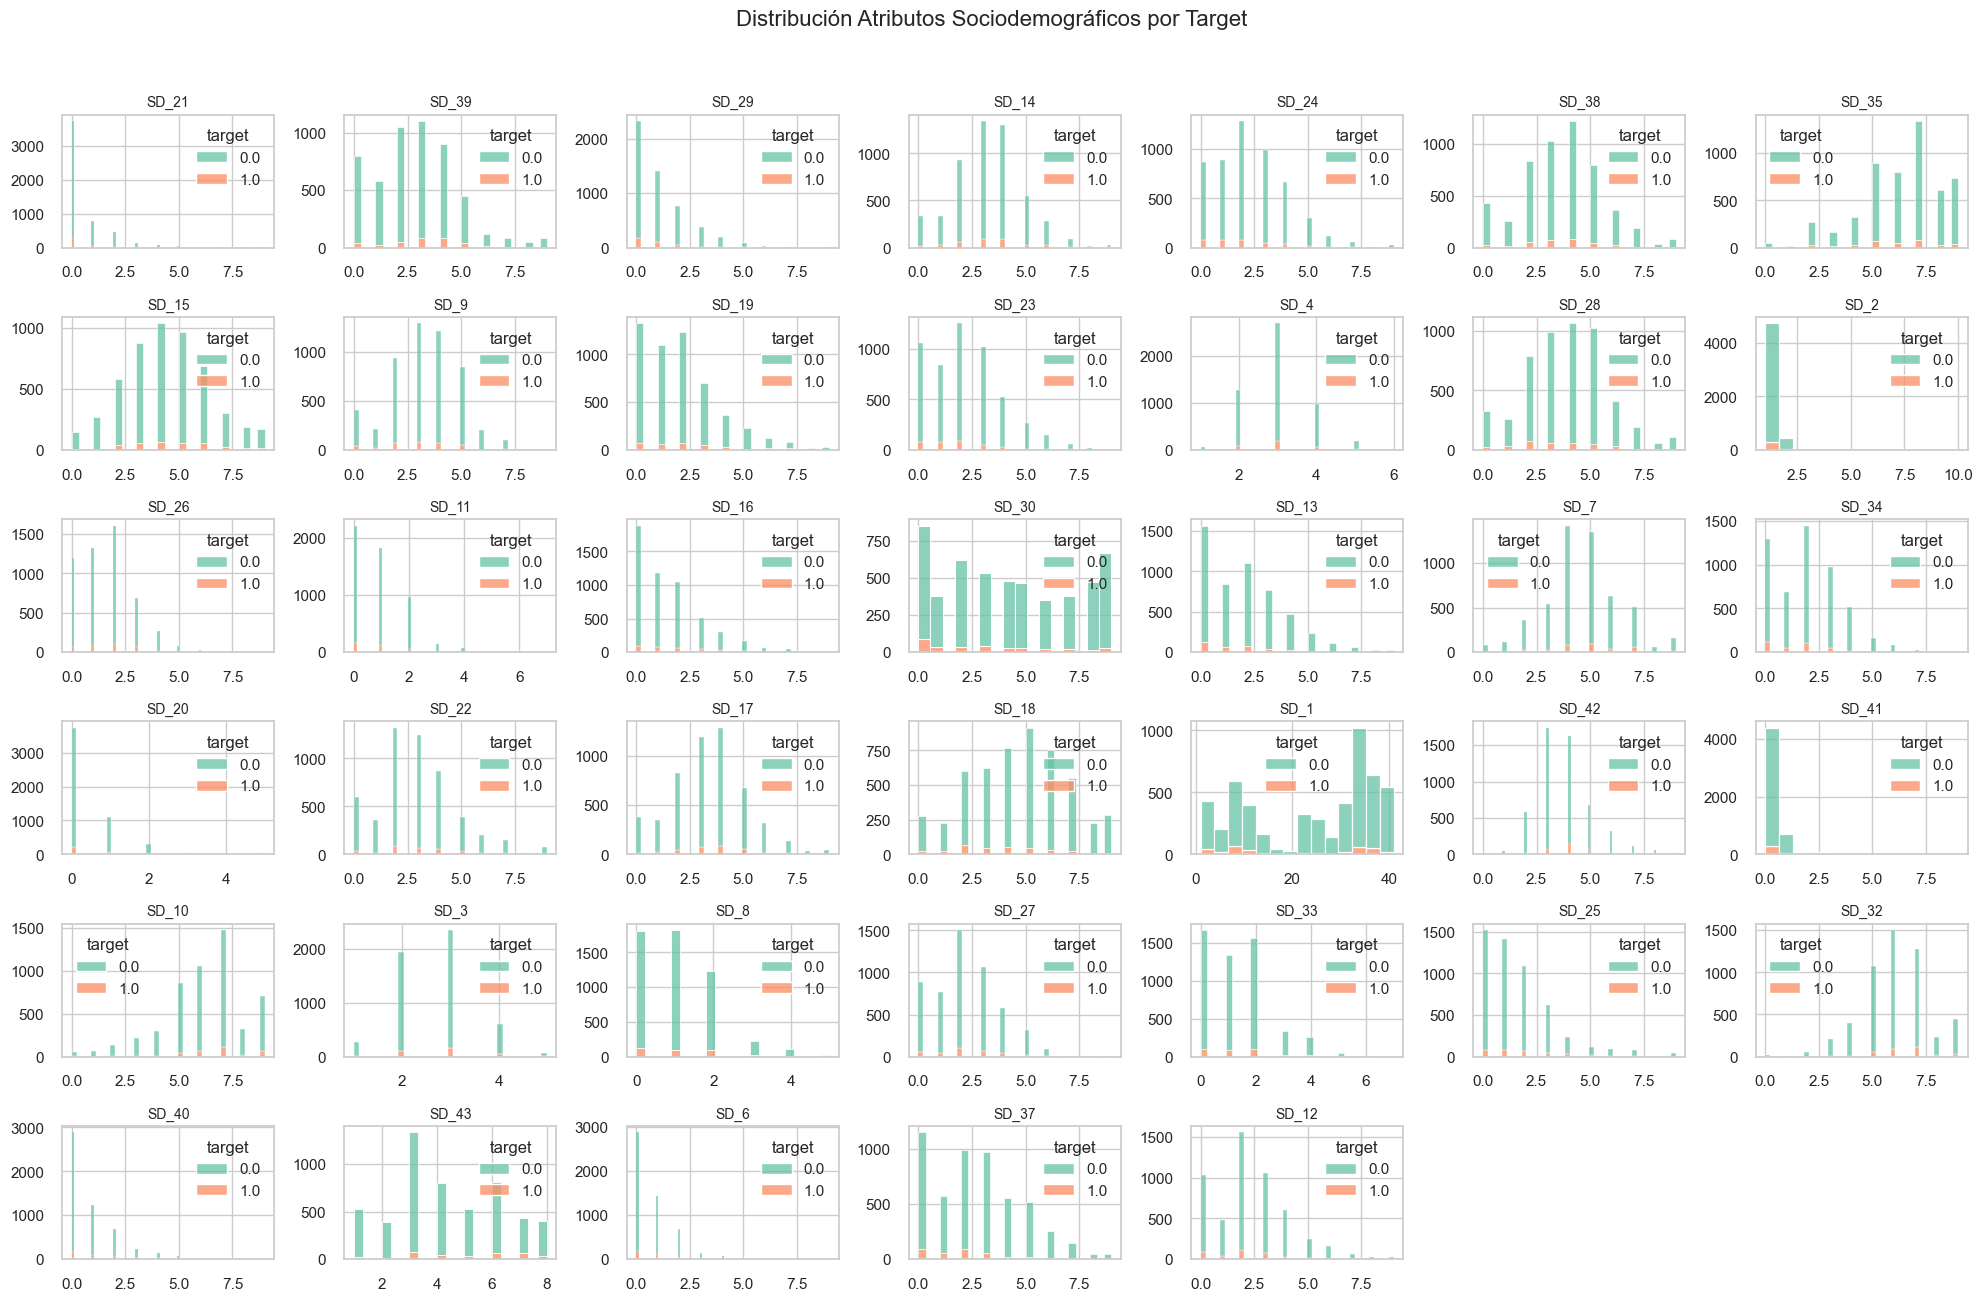

In [19]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(socio_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Distribución Atributos Sociodemográficos por Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


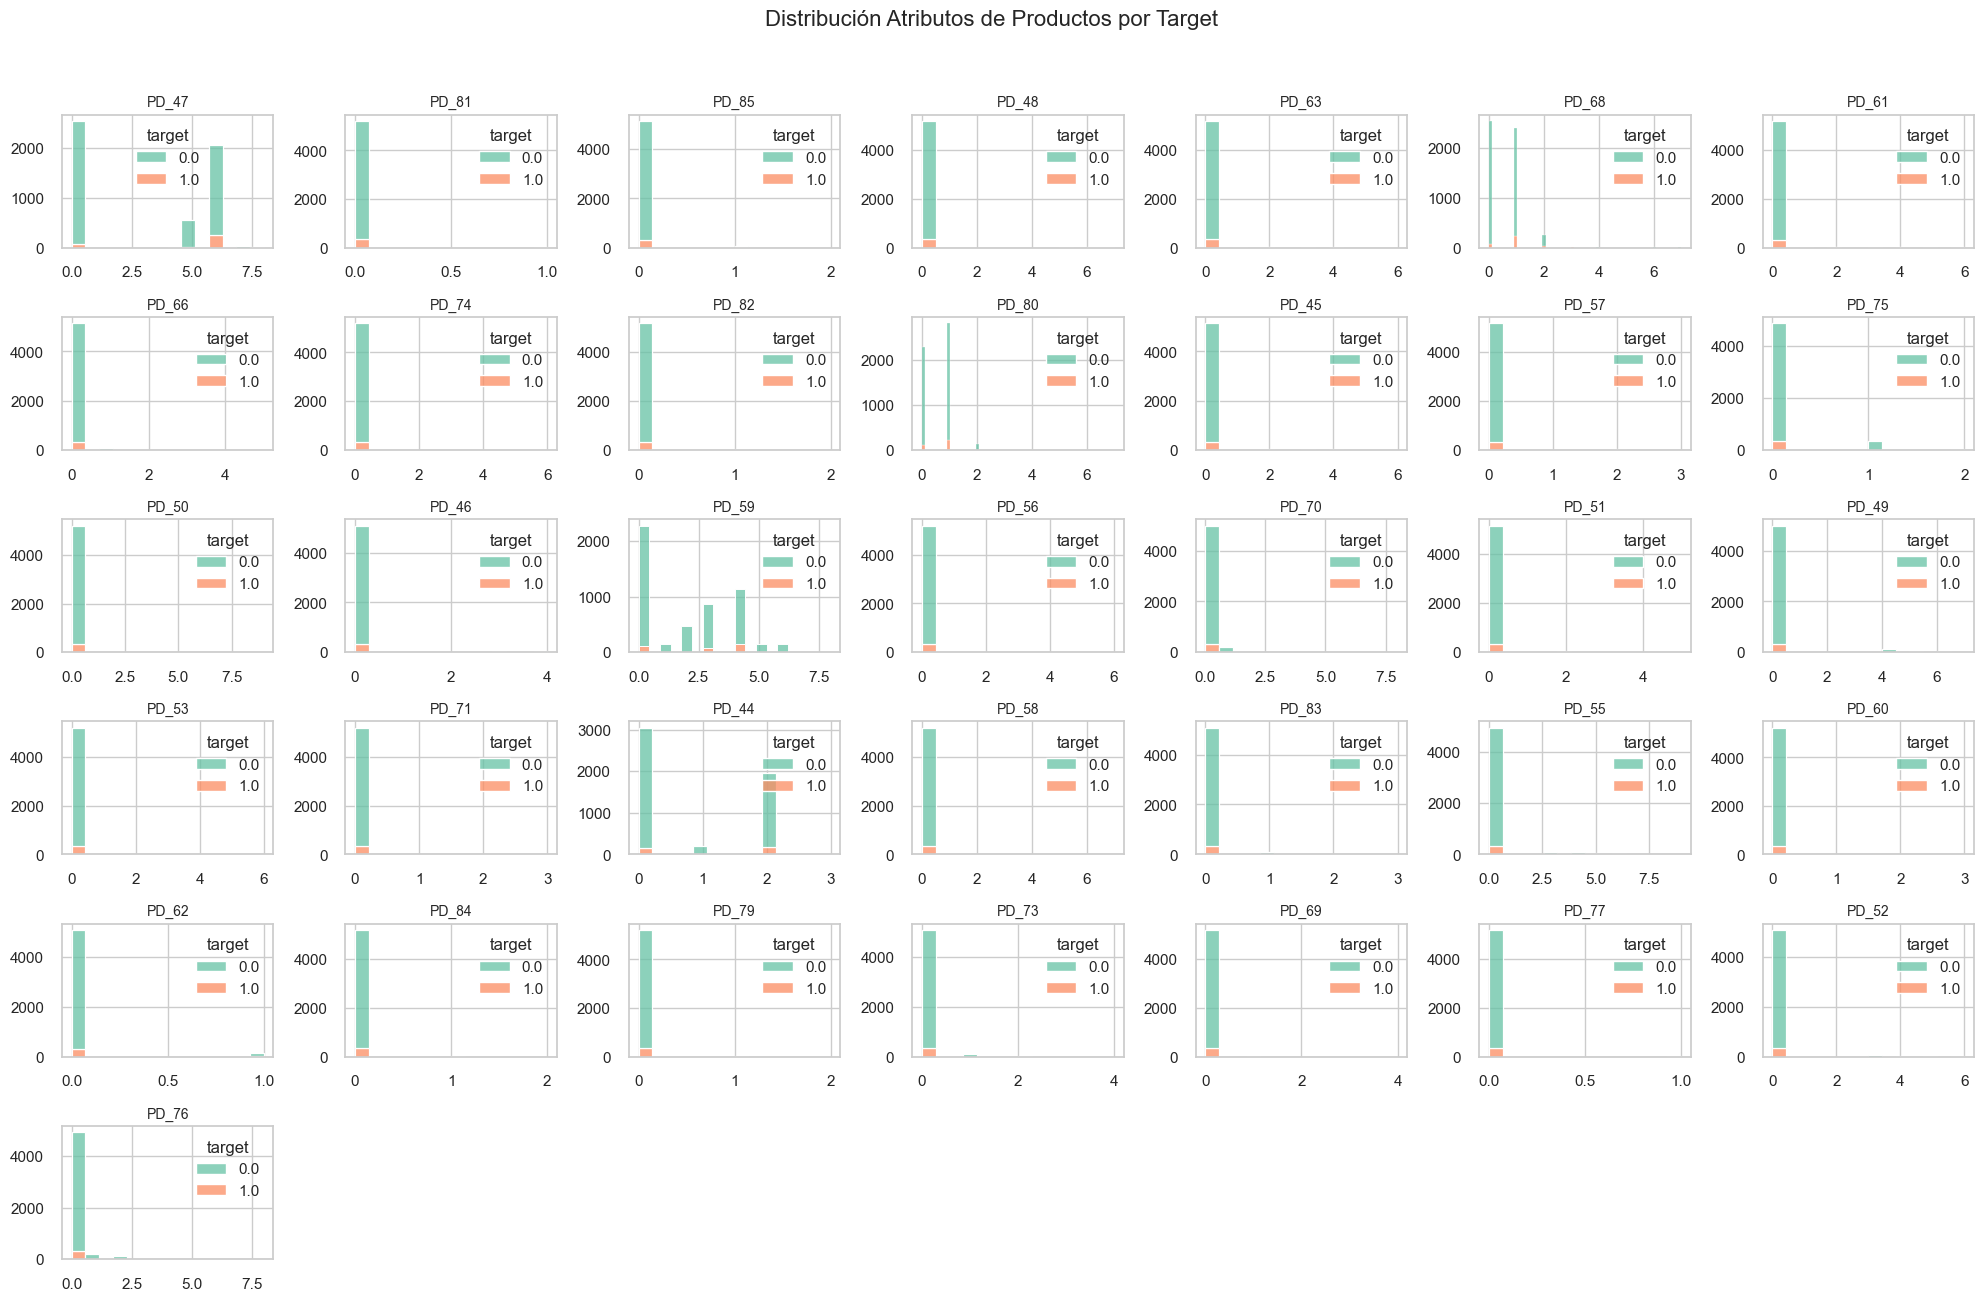

In [20]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Distribución Atributos de Productos por Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [21]:
import pandas as pd

# Umbrales
sparsity_threshold = 0.95  # % de un valor dominante
target_threshold = 0.05    # % mínimo de target=1 para conservar

cols_to_drop = []

for col in product_cols:
    # Valor más frecuente
    top_val = df[col].value_counts().idxmax()
    top_freq = df[col].value_counts(normalize=True).max()
    
    if top_freq >= sparsity_threshold:
        # Observaciones donde la columna != valor más frecuente
        mask = df[col] != top_val
        if mask.sum() == 0:
            # Todos iguales al valor dominante, eliminar
            cols_to_drop.append(col)
            continue
        
        # Proporción de target=1 entre observaciones diferentes al valor dominante
        prop_target1 = df.loc[mask, 'target'].mean()
        
        if prop_target1 < target_threshold:
            cols_to_drop.append(col)

print("Columnas de productos esparsas y poco informativas:")
print(cols_to_drop)
print("Número de columnas a eliminar:", len(cols_to_drop))

# Eliminar si se desea
df = df.drop(columns=cols_to_drop)

product_cols = list(set(product_cols) - set(cols_to_drop))


Columnas de productos esparsas y poco informativas:
['PD_48', 'PD_74', 'PD_50', 'PD_46', 'PD_56', 'PD_53', 'PD_71', 'PD_73', 'PD_69', 'PD_77', 'PD_52']
Número de columnas a eliminar: 11


In [22]:
# Binarización

""" Siguen existiendo columnas esparsas pero que si aportan información a target, lo que conviene es binarización para representar la presencia/ausencia de producto"""

# Umbral de esparsidad (porcentaje de valor dominante)
sparsity_threshold = 0.95

# Lista para rastrear columnas binarizadas
binarized_cols = []

for col in product_cols:
    # Proporción del valor más frecuente
    top_freq = df[col].value_counts(normalize=True).max()
    
    if top_freq >= sparsity_threshold:
        # Binarizamos: 1 si distinto del valor más frecuente (usualmente 0)
        df[col] = (df[col] > 0).astype(int)
        binarized_cols.append(col)

print("Columnas binarizadas por ser esparsas:")
print(binarized_cols)
print(f"Número de columnas procesadas: {len(binarized_cols)}")

Columnas binarizadas por ser esparsas:
['PD_81', 'PD_85', 'PD_63', 'PD_61', 'PD_66', 'PD_82', 'PD_45', 'PD_57', 'PD_70', 'PD_51', 'PD_49', 'PD_58', 'PD_83', 'PD_60', 'PD_62', 'PD_84', 'PD_79']
Número de columnas procesadas: 17


In [23]:
# Detectar columnas sesgadas
skewness = df[socio_cols].skew()
skewed_cols = skewness[abs(skewness) > 0.5].index.tolist()
print("Columnas sesgadas:", skewed_cols)

# Transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Aplicar transformación solo a columnas sesgadas
df = df.copy()
df[skewed_cols] = pt.fit_transform(df[skewed_cols])


Columnas sesgadas: ['SD_21', 'SD_39', 'SD_29', 'SD_24', 'SD_35', 'SD_19', 'SD_23', 'SD_2', 'SD_26', 'SD_11', 'SD_16', 'SD_13', 'SD_34', 'SD_20', 'SD_22', 'SD_42', 'SD_41', 'SD_10', 'SD_8', 'SD_33', 'SD_25', 'SD_40', 'SD_6', 'SD_37', 'SD_12']


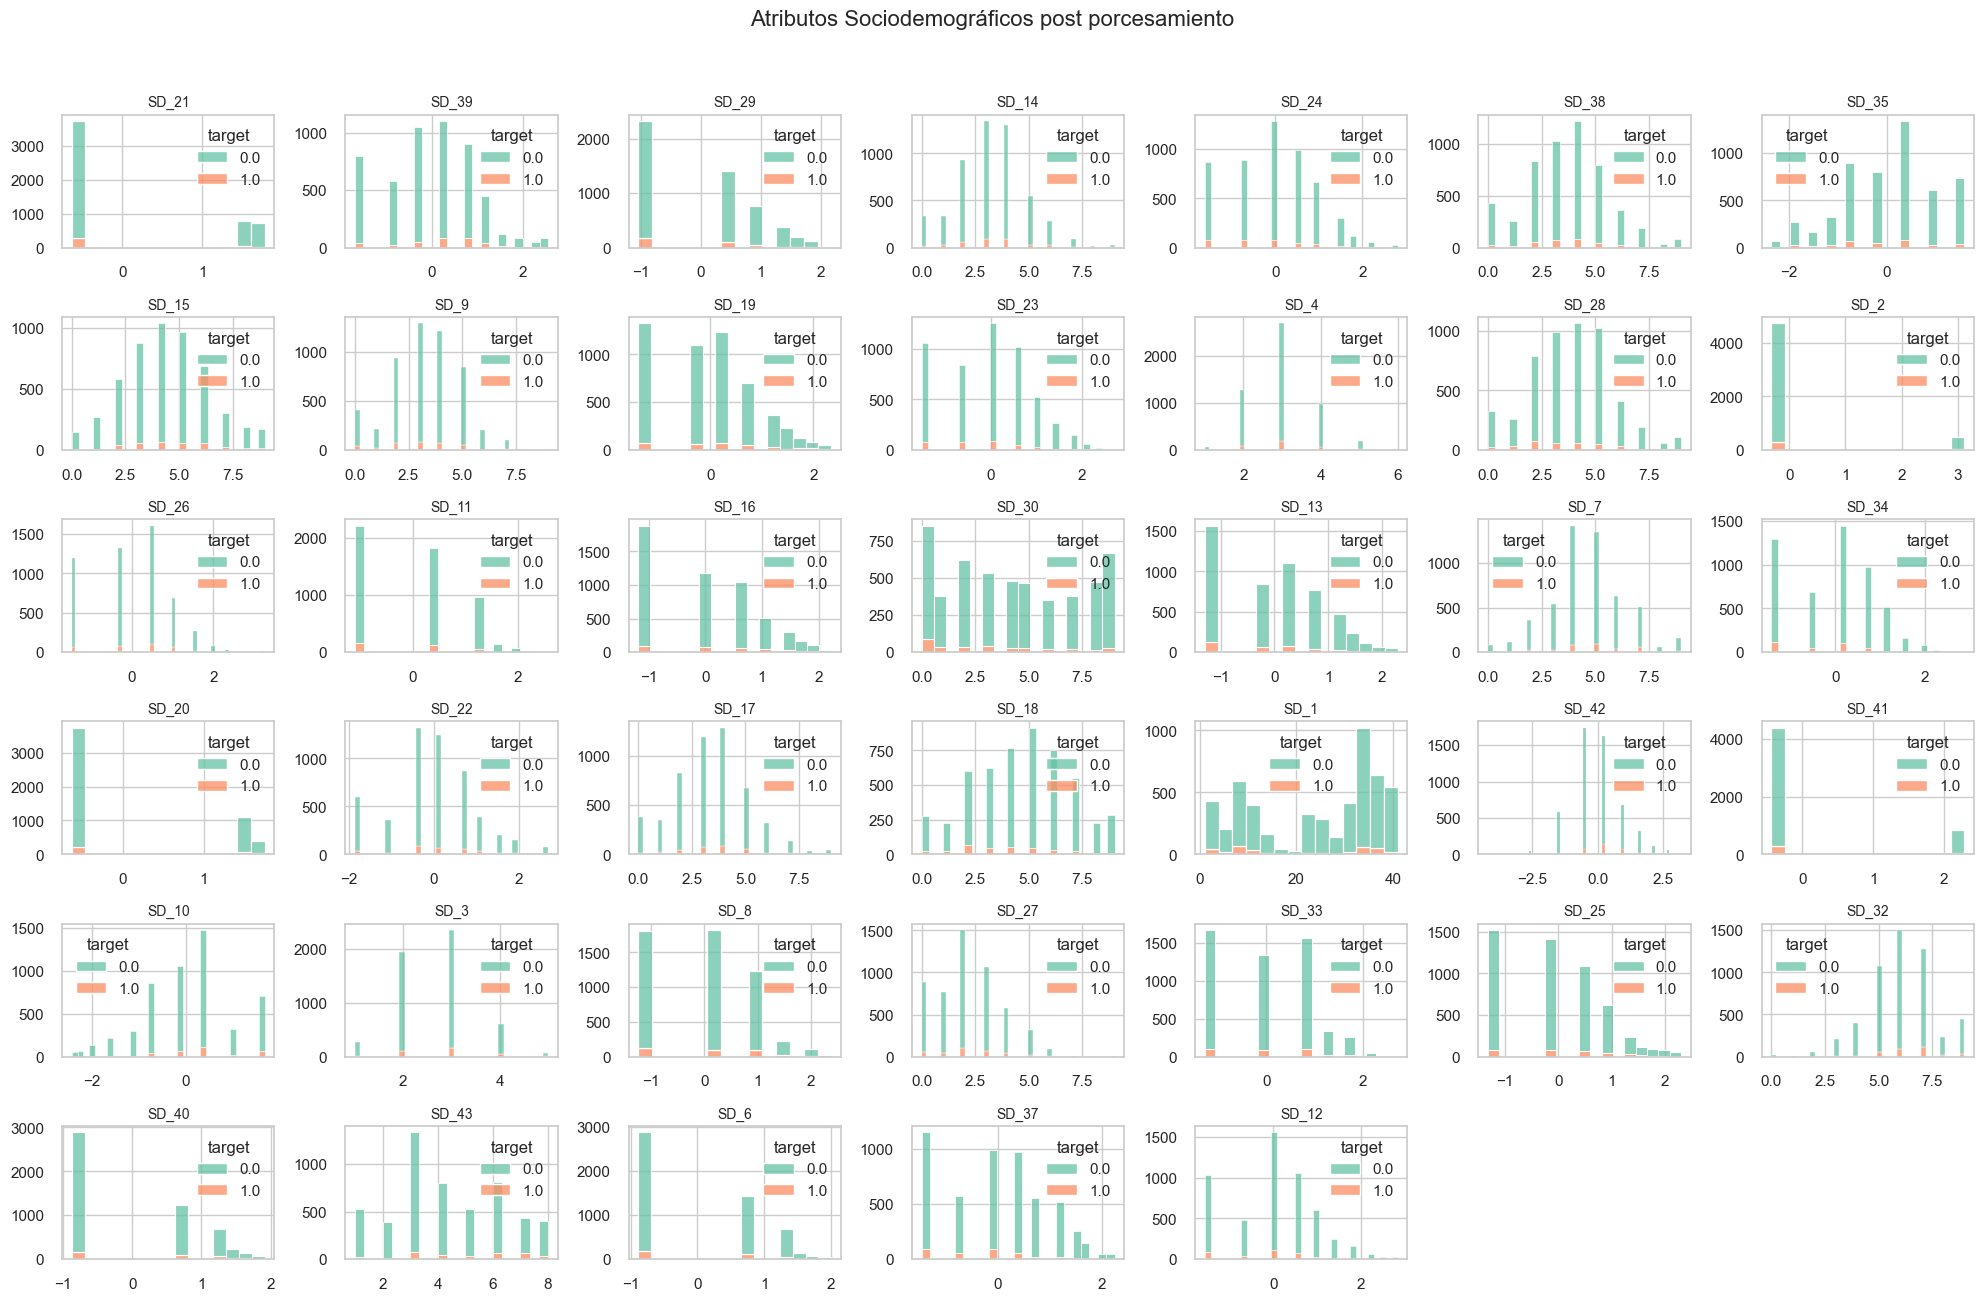

In [24]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(socio_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Atributos Sociodemográficos post porcesamiento", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


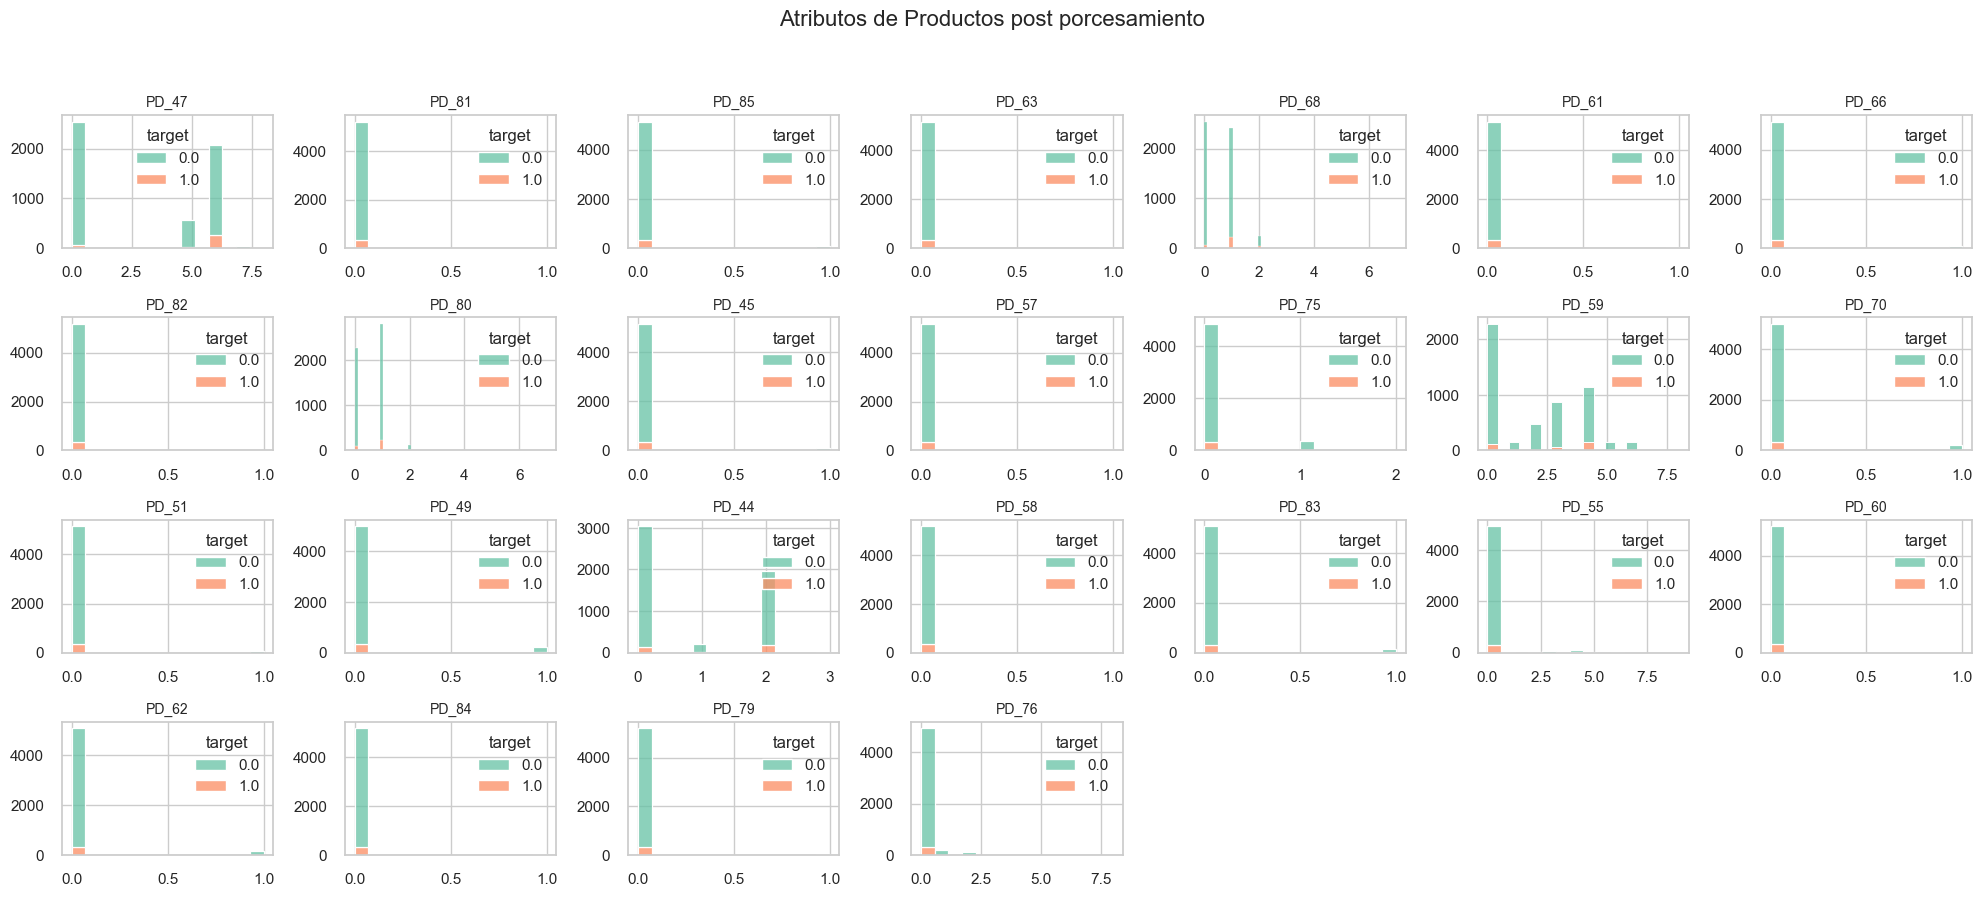

In [25]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Atributos de Productos post porcesamiento", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Escalamiento

Dado que probaremos con clasificadores basados en árboles:
* No dependen de la magnitud absoluta de los valores.
* Deciden los splits según umbral de la variable, no según distancia o norma.

Por lo tanto, técnicas como StandardScaler o MinMaxScaler no afectan el desempeño.

## Reducción de dimensiónalidad

In [26]:
X = df.drop(columns=['target'])

# Matriz de correlación
corr_matrix = X.corr().abs()

# Seleccionamos solo la mitad superior para evitar duplicados
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Columnas con alta correlación (> 0.8) con al menos otra columna
high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.8)]

print("Columnas candidatas para PCA/reducción de dimensionalidad por alta correlación:")
print(high_corr_cols)
print("Número de columnas candidatas:", len(high_corr_cols))

Columnas candidatas para PCA/reducción de dimensionalidad por alta correlación:
['SD_12', 'PD_66', 'PD_68', 'PD_70', 'PD_76', 'PD_79', 'PD_80', 'PD_81', 'PD_82', 'PD_83', 'PD_84']
Número de columnas candidatas: 11


In [27]:
from sklearn.decomposition import PCA


# ---------------------------------------
# Aplicar PCA solo a estas columnas
# ---------------------------------------
if high_corr_cols:
    pca = PCA(n_components=0.95, random_state=42)
    X_pca = pca.fit_transform(X[high_corr_cols])

    # Convertimos a DataFrame
    df_pca = pd.DataFrame(
        X_pca,
        columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])],
        index=df.index
    )

    print("Número de componentes retenidas:", X_pca.shape[1])
else:
    print("No se encontraron columnas suficientemente correlacionadas para PCA.")

Número de componentes retenidas: 5


In [28]:
# Columnas que no entraron en PCA
non_pca_cols = [col for col in df.columns if col not in high_corr_cols + ['target']]

# DataFrame final: PCA + resto de columnas + target
df_final = pd.concat([df_pca, df[non_pca_cols], df['target']], axis=1)

df_final.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,SD_1,SD_2,SD_3,SD_4,SD_6,...,PD_57,PD_58,PD_59,PD_60,PD_61,PD_62,PD_63,PD_75,PD_85,target
0,-0.014893,-0.477753,0.513182,-0.075962,-0.019882,37,-0.320806,2,2,0.842996,...,0,0,2.0,0,0,0,0,0.0,0,0.0
1,0.977986,0.524410,0.279800,-0.163315,-0.041267,37,-0.320806,2,2,-0.884991,...,0,0,2.0,0,0,0,0,0.0,0,0.0
2,-0.047491,0.491742,0.292373,-0.172624,-0.046563,9,-0.320806,3,3,1.362153,...,0,0,2.0,0,0,0,0,0.0,0,0.0
3,-0.014893,-0.477753,0.513182,-0.075962,-0.019882,40,-0.320806,4,2,0.842996,...,0,0,6.0,0,0,0,0,0.0,0,0.0
4,0.493731,0.298751,-0.685259,-0.056345,-0.054832,23,-0.320806,2,1,-0.884991,...,0,0,0.0,0,0,0,0,0.0,0,0.0


# Modelado con oversampling de la clase minoritaria

In [29]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns='target')
y = df_final['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_data = X_train.copy()
train_data['target'] = y_train


In [30]:
from pycaret.classification import setup, compare_models, evaluate_model

# Inicializar setup
clf_setup = setup(
    data=train_data,
    target='target',
    session_id=42,
    fix_imbalance=True,
    normalize=True,           # normaliza las features automáticamente
    fold=5                    # cross-validation
)


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(4175, 60)"
4,Transformed data shape,"(6717, 60)"
5,Transformed train set shape,"(5464, 60)"
6,Transformed test set shape,"(1253, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7040,0.7142,0.5947,0.1251,0.2067,0.1113,0.1633,0.0280
lda,Linear Discriminant Analysis,0.7033,0.7141,0.5895,0.1241,0.2049,0.1093,0.1604,0.0120
gbc,Gradient Boosting Classifier,0.9206,0.7136,0.0895,0.2247,0.1277,0.0941,0.1054,0.5840
lightgbm,Light Gradient Boosting Machine,0.9196,0.7127,0.0842,0.1970,0.1167,0.0830,0.0911,0.6700
lr,Logistic Regression,0.7149,0.7045,0.5579,0.1235,0.2021,0.1071,0.1534,0.5880
xgboost,Extreme Gradient Boosting,0.9134,0.6981,0.0737,0.1489,0.0971,0.0581,0.0623,0.0800
ada,Ada Boost Classifier,0.8860,0.6934,0.1526,0.1458,0.1488,0.0879,0.0881,0.1260
rf,Random Forest Classifier,0.9151,0.6749,0.0526,0.1323,0.0741,0.0382,0.0433,0.1520
nb,Naive Bayes,0.6003,0.6474,0.5947,0.1029,0.1691,0.0678,0.1104,0.3640
svm,SVM - Linear Kernel,0.6786,0.6444,0.5421,0.1075,0.1792,0.0795,0.1208,0.0320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6868,0.6546,0.6176,0.1224,0.2044,0.1073,0.1625


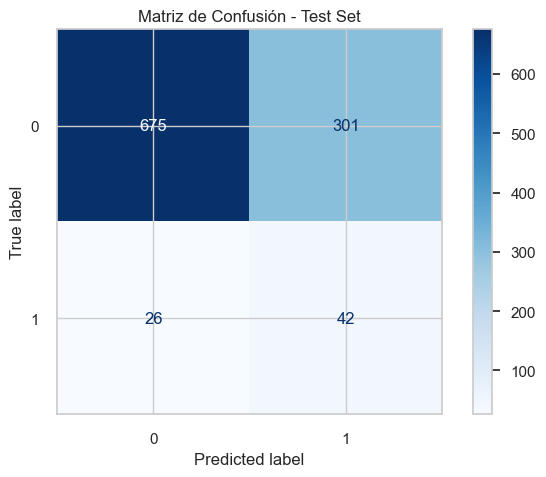

In [31]:

# Encuentra el mejor modelo automáticamente
best_model = compare_models(
    sort='AUC',      # dado que es desbalanceado, AUC es un buen criterio
    n_select=1
)


# Crear DataFrame de test
test_data = X_test.copy()
test_data['target'] = y_test

# Predicciones
predictions = predict_model(best_model, data=test_data)
predictions.head()


# Matriz de confusión
y_true = predictions['target']
y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Mostrar
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Test Set")
plt.show()


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(4175, 60)"
4,Transformed data shape,"(6659, 60)"
5,Transformed train set shape,"(5406, 60)"
6,Transformed test set shape,"(1253, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7060,0.7118,0.5737,0.1226,0.2019,0.1063,0.1547,0.0120
lda,Linear Discriminant Analysis,0.7057,0.7119,0.5737,0.1225,0.2017,0.1060,0.1545,0.0120
lr,Logistic Regression,0.7170,0.7033,0.5526,0.1233,0.2014,0.1067,0.1523,0.0160
svm,SVM - Linear Kernel,0.6807,0.6513,0.5368,0.1076,0.1792,0.0796,0.1199,0.0220
nb,Naive Bayes,0.5904,0.6474,0.6158,0.1060,0.1747,0.0734,0.1158,0.0160
ada,Ada Boost Classifier,0.8888,0.6923,0.1632,0.1560,0.1593,0.0999,0.1000,0.1060
dt,Decision Tree Classifier,0.8641,0.5574,0.1895,0.1307,0.1544,0.0836,0.0853,0.0300
knn,K Neighbors Classifier,0.6988,0.5909,0.4053,0.0910,0.1486,0.0475,0.0676,0.0200
gbc,Gradient Boosting Classifier,0.9227,0.7198,0.0842,0.2405,0.1240,0.0930,0.1077,0.4980
qda,Quadratic Discriminant Analysis,0.7861,0.5686,0.2368,0.0945,0.1220,0.0391,0.0443,0.0140


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6820,0.6452,0.6029,0.1185,0.1981,0.1001,0.1523


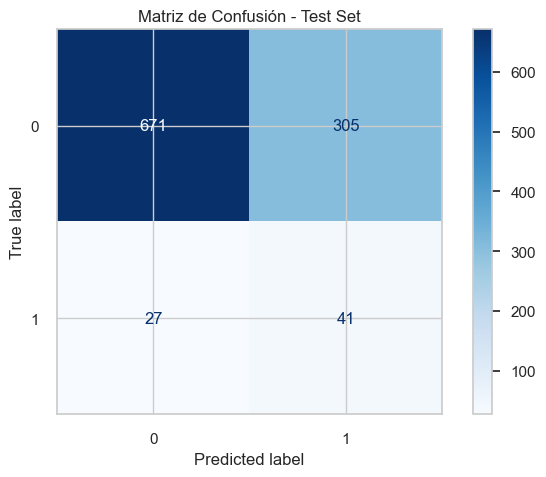

In [32]:
# -----------------------------
# Opción 2: ADASYN
# -----------------------------
exp2 = setup(
    train_data,
    target='target',
    session_id=42,
    fix_imbalance=True,
    fix_imbalance_method=ADASYN(random_state=42),  # técnica alternativa
    normalize=True,           # normaliza las features automáticamente
    fold=5
)


best_model = compare_models(
    sort='F1', 
    n_select=1
)


# Crear DataFrame de test
test_data = X_test.copy()
test_data['target'] = y_test

# Predicciones
predictions = predict_model(best_model, data=test_data)
predictions.head()


# Matriz de confusión
y_true = predictions['target']
y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Mostrar
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Test Set")
plt.show()


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(4175, 60)"
4,Transformed data shape,"(5777, 60)"
5,Transformed train set shape,"(4524, 60)"
6,Transformed test set shape,"(1253, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8727,0.7146,0.3158,0.1981,0.2432,0.1777,0.1836,0.4600
lightgbm,Light Gradient Boosting Machine,0.8720,0.7259,0.2579,0.1730,0.2068,0.1401,0.1436,0.6100
ada,Ada Boost Classifier,0.8285,0.6947,0.3368,0.1454,0.2030,0.1235,0.1374,0.1180
rf,Random Forest Classifier,0.8679,0.6871,0.2474,0.1609,0.1947,0.1262,0.1299,0.1200
et,Extra Trees Classifier,0.8539,0.6688,0.2632,0.1476,0.1890,0.1155,0.1215,0.0660
lr,Logistic Regression,0.6194,0.7084,0.6789,0.1095,0.1885,0.0862,0.1480,0.0320
xgboost,Extreme Gradient Boosting,0.8655,0.6892,0.2368,0.1530,0.1856,0.1160,0.1195,0.0680
lda,Linear Discriminant Analysis,0.5999,0.7115,0.7000,0.1068,0.1853,0.0817,0.1461,0.0300
ridge,Ridge Classifier,0.5986,0.7116,0.7000,0.1065,0.1848,0.0811,0.1453,0.0300
dt,Decision Tree Classifier,0.8101,0.5875,0.3316,0.1264,0.1828,0.0985,0.1139,0.0500


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8582,0.7559,0.3382,0.1825,0.2371,0.1666,0.1763


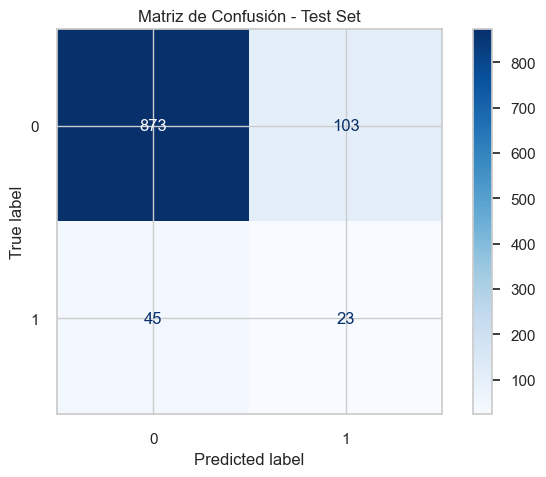

In [33]:
# -----------------------------
# Opción 3: SMOTEENN (oversampling + undersampling)
# -----------------------------
exp3 = setup(
    train_data,
    target='target',
    session_id=42,
    fix_imbalance=True,
    fix_imbalance_method=SMOTEENN(random_state=42),
    normalize=True,           # normaliza las features automáticamente
    fold=5
)



best_model = compare_models(
    sort='F1', 
    n_select=1
)


# Crear DataFrame de test
test_data = X_test.copy()
test_data['target'] = y_test

# Predicciones
predictions = predict_model(best_model, data=test_data)
predictions.head()


# Matriz de confusión
y_true = predictions['target']
y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Mostrar
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Test Set")
plt.show()


# Modelado con undersampling de la clase mayoritaria

In [34]:


# Crear objeto de undersampling
rus = RandomUnderSampler(random_state=42)

# Ajustar y transformar
X_res, y_res = rus.fit_resample(X_train, y_train)

# Reconstruir DataFrame para PyCaret
train_data_resampled = pd.DataFrame(X_res, columns=X_train.columns)
train_data_resampled['target'] = y_res

print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución tras undersampling:")
print(y_res.value_counts())

# -------------------------------
# 2️⃣ Setup de PyCaret con el dataset balanceado
# -------------------------------
from pycaret.classification import setup

exp = setup(
    train_data_resampled,
    target='target',
    session_id=42,
    fix_imbalance=False,  # ya balanceaste manualmente
    normalize=True
)


Distribución original:
0.0    3903
1.0     272
Name: target, dtype: int64

Distribución tras undersampling:
0.0    272
1.0    272
Name: target, dtype: int64


,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(544, 60)"
4,Transformed data shape,"(544, 60)"
5,Transformed train set shape,"(380, 60)"
6,Transformed test set shape,"(164, 60)"
7,Numeric features,59
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5474,0.7108,0.1368,0.7514,0.2265,0.0947,0.1601,0.0040
gbc,Gradient Boosting Classifier,0.6447,0.7090,0.6474,0.6489,0.6422,0.2895,0.2944,0.0230
ada,Ada Boost Classifier,0.6395,0.6994,0.6105,0.6495,0.6239,0.2789,0.2830,0.0140
lr,Logistic Regression,0.6421,0.6993,0.6263,0.6496,0.6347,0.2842,0.2865,0.0040
lightgbm,Light Gradient Boosting Machine,0.6395,0.6949,0.6368,0.6389,0.6341,0.2789,0.2839,0.1760
ridge,Ridge Classifier,0.6263,0.6885,0.6158,0.6294,0.6199,0.2526,0.2542,0.0050
xgboost,Extreme Gradient Boosting,0.6421,0.6866,0.6263,0.6512,0.6350,0.2842,0.2876,0.0130
lda,Linear Discriminant Analysis,0.6263,0.6860,0.6211,0.6286,0.6217,0.2526,0.2546,0.0050
knn,K Neighbors Classifier,0.6263,0.6781,0.6263,0.6284,0.6238,0.2526,0.2556,0.0050
et,Extra Trees Classifier,0.6263,0.6766,0.5842,0.6382,0.6071,0.2526,0.2555,0.0220


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9004,0.6850,0.1029,0.1400,0.1186,0.0672,0.0680


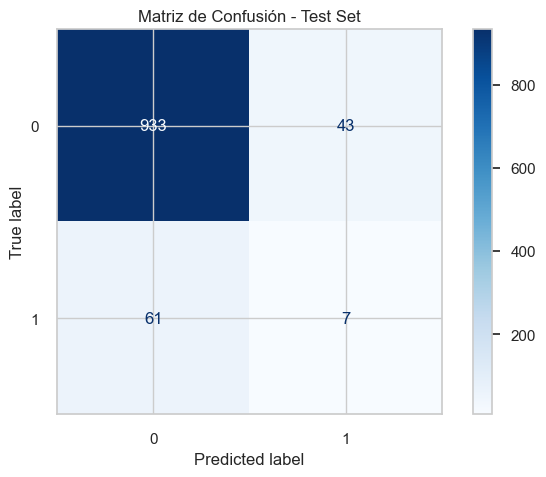

In [35]:

# Encuentra el mejor modelo automáticamente
best_model = compare_models(
    sort='AUC',      # dado que es desbalanceado, AUC es un buen criterio
    n_select=1
)


# Crear DataFrame de test
test_data = X_test.copy()
test_data['target'] = y_test

# Predicciones
predictions = predict_model(best_model, data=test_data)
predictions.head()


# Matriz de confusión
y_true = predictions['target']
y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Mostrar
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Test Set")
plt.show()


# Modelado con ajuste de pesos de clase (class weighting)

### Regresión lógistica

In [36]:



model = LogisticRegression(
    class_weight='balanced',  # ajusta automáticamente pesos de clases
    solver='liblinear',        # bueno para datasets pequeños / medianos
    max_iter=1000,
    random_state=42
)

# Entrenar
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  # probabilidades de clase positiva
y_pred = (y_prob >= 0.5).astype(int)       # umbral por defecto = 0.5

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[672 304]
 [ 21  47]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81       976
         1.0       0.13      0.69      0.22        68

    accuracy                           0.69      1044
   macro avg       0.55      0.69      0.51      1044
weighted avg       0.92      0.69      0.77      1044



In [37]:


# Formula: scale_pos_weight = (# negativos) / (# positivos)
n_neg = sum(y_train == 0)
n_pos = sum(y_train == 1)
scale_pos_weight = n_neg / n_pos

print("Scale pos weight:", scale_pos_weight)


model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    n_estimators=500,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)  # umbral por defecto


print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Scale pos weight: 14.349264705882353
Matriz de Confusión:
[[885  91]
 [ 51  17]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       976
         1.0       0.16      0.25      0.19        68

    accuracy                           0.86      1044
   macro avg       0.55      0.58      0.56      1044
weighted avg       0.89      0.86      0.88      1044



# Conclusión

Después de aplicar preprocesamiento, EDA, feature engineering, diversos experimentos gracias a pycaret e incluso evaluar diferentes soluciones al problema del in-balanceo de clases, el modelo que mejor performo fue Ridge Classifier con métricas:


* Accuracy 0.7060			
* AUC	0.7118
* Recall 0.5737
* Prec.0.1226
* F1	0.2019
* Kappa	0.1063
* MCC	0.1547

y aplicando SMOTE para el oversampling después de todas las técnicas y transformaciones hechas en el preprocesamiento. Si bien el número de verdaderos positivos es mayor que el número falsos negativos, sigue siendo 1 a 5 vs la proporción de falsos positivos, por lo que nuestro modelo tiende a sobre estimar la obtencion del seguro de caravana. Se recomienda la exploración de modelos no tradicionales del ML si no más enfocados a aprendizaje profundo como redes neuroanles. Sin embargo dado el objetivo de la clase, nos enfocaremos en la POO del proyecto asi como la construcción del Pipeline.